<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [59]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Read the data

Load the csv file and print the first five observations.

In [60]:
# type your code here
df = pd.read_csv("rainfall_prediction.csv")

df.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.6,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,2,0.0,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,3,0.0,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,4,0.8,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,5,40.4,3.0,3.6,18.725,35.333333,81.5,1005.60,0


**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here
df.corr()
df = df.drop(["Obs_Id","Temp","Evaporation"],axis = 1)
df.head()
df.shape

(1520, 6)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
a = df[df.duplicated()]
df.drop_duplicates(inplace = True)
len(a)


20

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


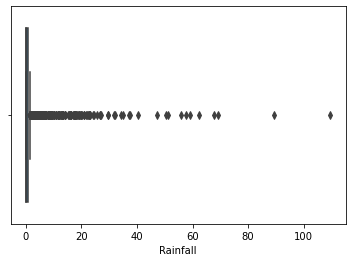

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


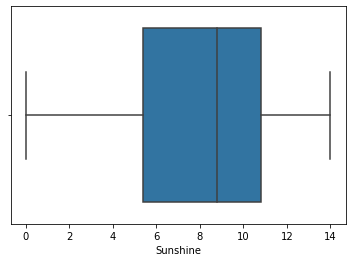

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


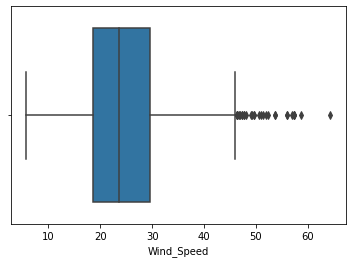

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


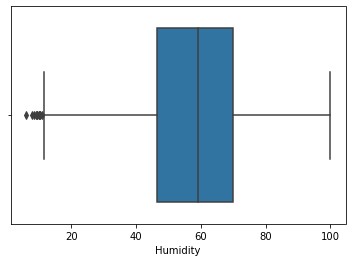

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


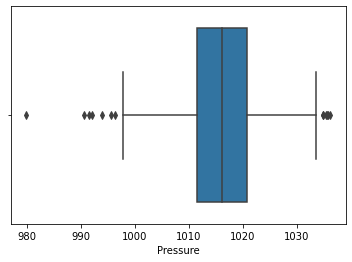

(1500, 5)


(1487, 5)

In [73]:
# type your code here
x = df.drop("RainTomorrow",axis = 1)
y = df["RainTomorrow"]
for col in x.columns:
    sns.boxplot(x[col])
    plt.show()
for col in x.columns:
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + (1.5*iqr)
    lb = q1  - (1.5*iqr)
    df_out = x[~((x[col] < lb) | (x[col] > ub))]
print(x.shape)
df_out.shape


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# type your code here
# Yes scaling is required for KNN

from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
mx.fit(x)
scaled_x  = mx.transform(x)
new_x = pd.DataFrame(data = scaled_x,columns = x.columns)


,Rainfall,Sunshine,Wind_Speed,Humidity,Pressure
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.019854,0.563810,0.326557,0.546457,0.646208
std,0.067190,0.263655,0.147976,0.191375,0.123009
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.385714,0.221591,0.430851,0.560673
50%,0.000000,0.628571,0.306818,0.563830,0.642604
75%,0.005474,0.771429,0.409091,0.680851,0.726306
max,1.000000,1.000000,1.000000,1.000000,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# type your code here
x = new_x
y = df["RainTomorrow"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7,metric = "chebyshev")
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score,plot_roc_curve
accuracy_score(y_test,y_pred)


0.8311111111111111

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [85]:
# type your code here
d=  {"n_neighbors":[3,5,7,9,11,13]}
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
gc = GridSearchCV(estimator = knn,param_grid=d,cv = 5)
gc.fit(x_train,y_train)
gc.best_params_

{'n_neighbors': 11}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

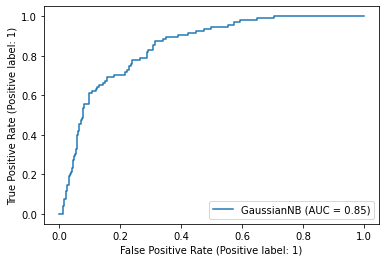

In [87]:
# type your code here
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
plot_roc_curve(nb,x_test,y_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
# type your code here
d=  {"n_neighbors" : [19],"metric":["manhattan","euclidean","chebyshev"]}
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
gc = GridSearchCV(estimator = knn,param_grid=d,cv = 5)
gc.fit(x_train,y_train)
gc.best_params_

{'metric': 'chebyshev', 'n_neighbors': 19}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
# type your code h
qp = x_test.values[0]
s = []
for pts in x_test.values:
    d = np.linalg.norm(qp - pts)
    s.append(d)
s.sort()
print(s[0:5])

[0.0, 0.09446145005504347, 0.10891249037915125, 0.1217908404364731, 0.12346677816459058]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
# type your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 19,metric = "chebyshev")
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
s = confusion_matrix(y_test,y_pred)
s

array([[340,  15],
       [ 61,  34]], dtype=int64)

In [126]:
print("The no of false predictions:",s[0][1]+s[1][0])

The no of false predictions: 76
